# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Data

In [2]:
data = pd.read_csv('Sequences.csv')

In [3]:
data.head()

,Sequence,Length,Solved
0,"[1, 3, 13, 87, 1053, 28576, 2141733, 508147108...",14,NaN
1,"[1, 2, 1, 5, 5, 1, 11, 16, 7, 1, 23, 44, 30, 9...",57,NaN
2,"[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 12...",41,NaN
3,"[1, 8, 25, 83, 274, 2275, 132224, 1060067, 331...",20,NaN
4,"[1, 111, 12211, 1343211, 147753211, 1625285321...",12,NaN


In [4]:
data['Sequence'] = data['Sequence'].progress_apply(eval)

In [5]:
data['Sequence'][0]

[1,
 3,
 13,
 87,
 1053,
 28576,
 2141733,
 508147108,
 402135275365,
 1073376057490373,
 9700385489355970183,
 298434346895322960005291,
 31479360095907908092817694945,
 11474377948948020660089085281068730]

# Recurrence Relations

In [6]:
def checkRecurrence(seq, order= 2, minlength = 7):

    if len(seq)< max((2*order+1), minlength):
        return None
    
    # Set up the system of equations 
    A,b = [], []
    for i in range(order):
        A.append(seq[i:i+order])
        b.append(seq[i+order])
    A,b =np.array(A), np.array(b)
    try: 
        if np.linalg.det(A)==0:
            return None
    except TypeError:
        return None
   
    #  Solve for the coefficients (c0, c1, c2, ...)
    coeffs = np.linalg.inv(A).dot(b)  
    
    #  Check if the next terms satisfy recurrence relation
    for i in range(2*order, len(seq)):
        predict = np.sum(coeffs*np.array(seq[i-order:i]))
        if abs(predict-seq[i])>10**(-2):
            return None
    
    return list(coeffs)

In [7]:
def predictNextTerm_Recurrence(seq, coeffs):
    order = len(coeffs)
    predict = np.sum(coeffs*np.array(seq[-order:]))
    return int(round(predict))

## 10th - 1st (GP) Order Sequences

Solving 10 order


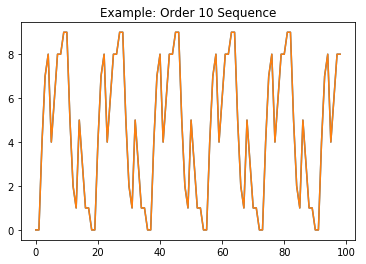


Solved order 10: 638 (0.28%)
Solving 9 order


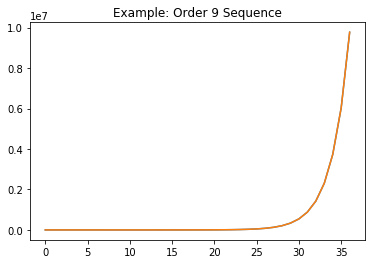


Solved order 9: 768 (0.34%)
Solving 8 order


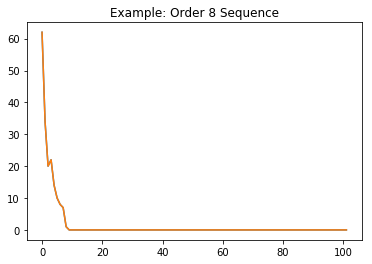


Solved order 8: 780 (0.35%)
Solving 7 order


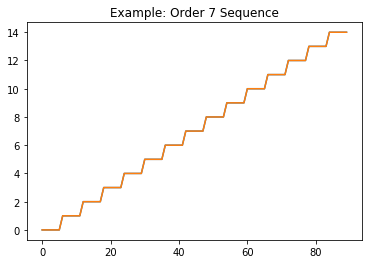


Solved order 7: 1032 (0.46%)
Solving 6 order


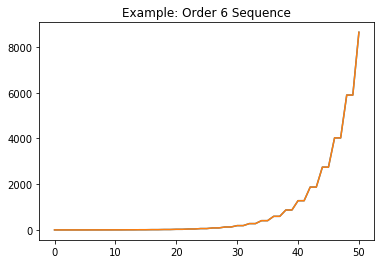


Solved order 6: 1751 (0.78%)
Solving 5 order


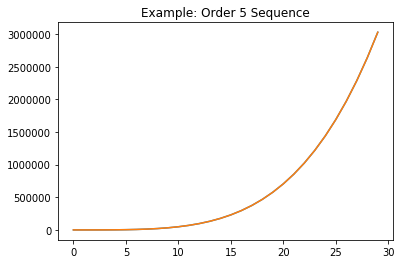


Solved order 5: 2503 (1.11%)
Solving 4 order


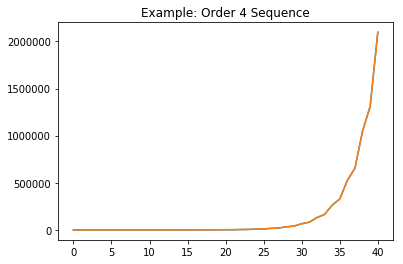


Solved order 4: 3305 (1.47%)
Solving 3 order


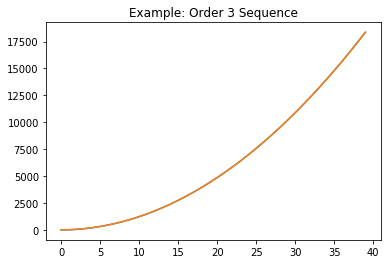


Solved order 3: 3838 (1.7%)
Solving 2 order


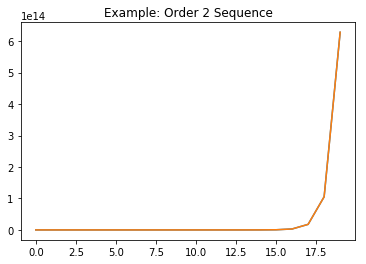


Solved order 2: 2616 (1.16%)
Solving 1 order


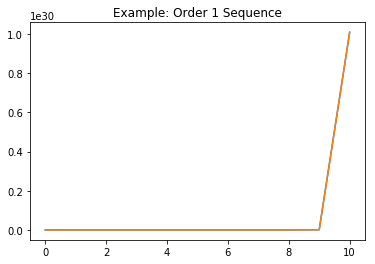


Solved order 1: 228 (0.1%)


In [8]:
for order in range(10, 0, -1):
    print(f'Solving {order} order')
    count = 0
    for i, seq in tqdm(enumerate(data['Sequence'])):
        coeff = checkRecurrence(seq,order)
        if coeff:
            count += 1
            data.loc[i, 'Solved'] = f'r{order}'
            if count == 1:
                fig, ax = plt.subplots()
                ax.plot(seq)
                plt.plot(seq)
                ax.set_title(f'Example: Order {order} Sequence')
                plt.show()

    print(f'Solved order {order}: {count} ({round((count*100)/len(data),2)}%)')

# Final Standings

In [9]:
data['Solved'].fillna('').value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

       92.3%
r3     1.69%
r4     1.46%
r2     1.16%
r5      1.1%
r6     0.77%
r7     0.45%
r8     0.34%
r9     0.34%
r10    0.27%
r1      0.1%
Name: Solved, dtype: object

In [10]:
data.to_csv('Sequences.csv', index=False)